### Generate Optimal Trajectory Emission Files

In [ ]:
import scipy.io
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from trajectory.env.energy_models import PFM2019RAV4

energy_model = PFM2019RAV4()

base_dir = "/home/aboudy/Documents/Code/trajectory_training/dataset/data_v2_preprocessed_west"
trajectory_directories = os.listdir(base_dir)

directories = os.listdir('optimal/data/')

for directory in directories:
    print(directory)
    mat = scipy.io.loadmat('optimal/data/{}/results.mat'.format(directory))

    name = next(x for x in trajectory_directories if directory.split("_")[0] in x)

    df = pd.read_csv(os.path.join(base_dir, name, "trajectory.csv"))

    lead_speed = np.array(df["Velocity"] / 3.6)[:-200]
    lead_pos = np.array(df["DistanceGPS"] - df.at[0, "DistanceGPS"] + 92.01981072331067)[:-200]
    pos = mat['X_star'].flatten()[:-200]
    headway = lead_pos - pos - 5
    speed = mat['V_star'].flatten()[:-200]
    accel = mat['U_star'].flatten()[:-200]
    energy = [energy_model.get_instantaneous_fuel_consumption(x, y, 0) for x, y in zip(accel, speed)]

    data = {
        "time": list(0.1 * np.arange(len(headway))),
        "id": ["av"] * len(headway),
        "headway": list(headway),
        "target_accel_no_noise_no_failsafe": list(accel),
        "accel": list(accel),
        "speed": list(speed),
        "leader_speed": list(lead_speed),
        "instant_energy_consumption": energy,
    }

    pd.DataFrame(data).to_csv(os.path.join("optimal/emissions/{}.csv".format(name)), index=False)

### Plot Replay Buffer Values

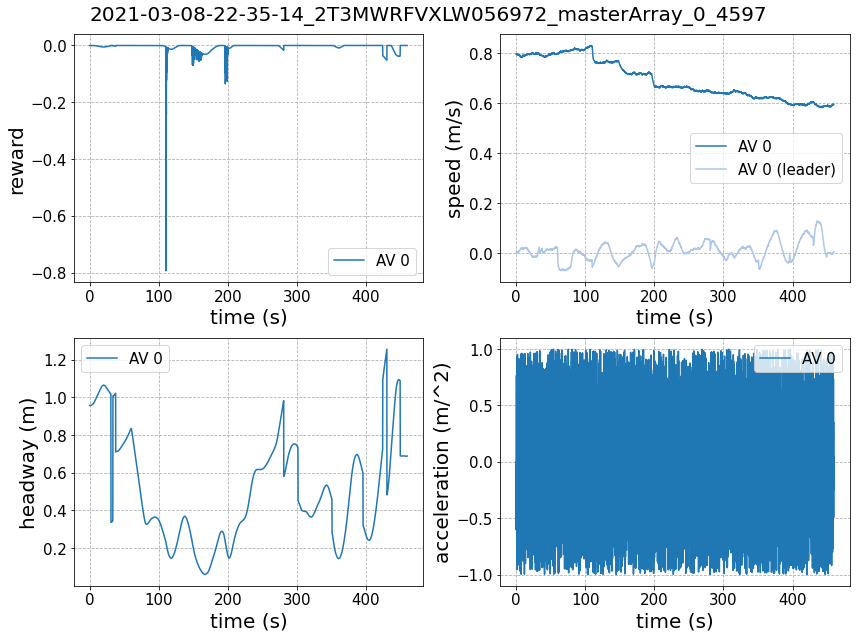

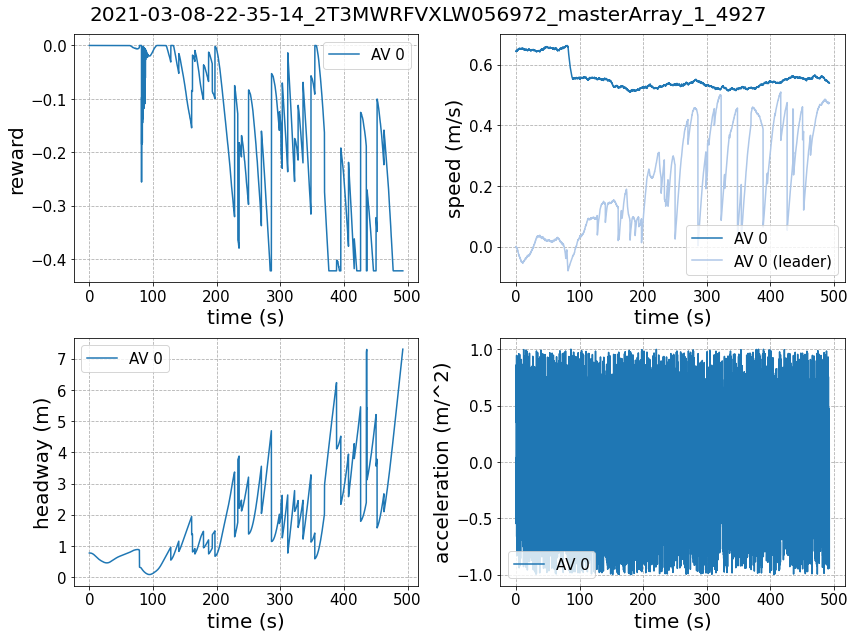

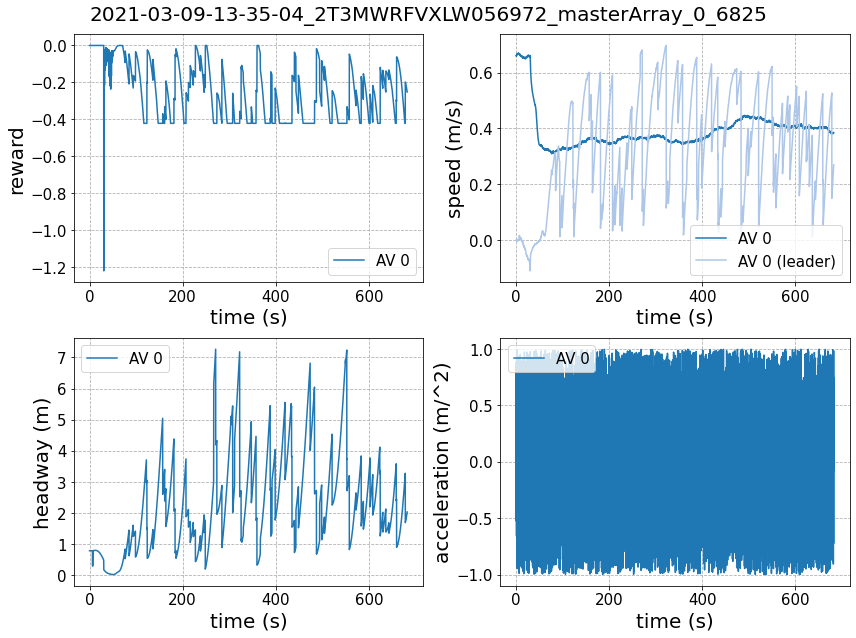

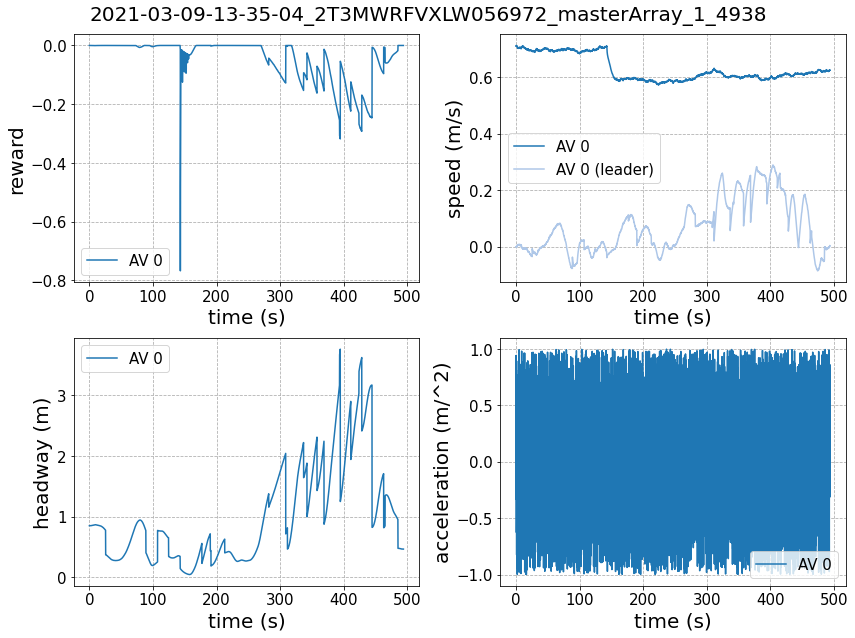

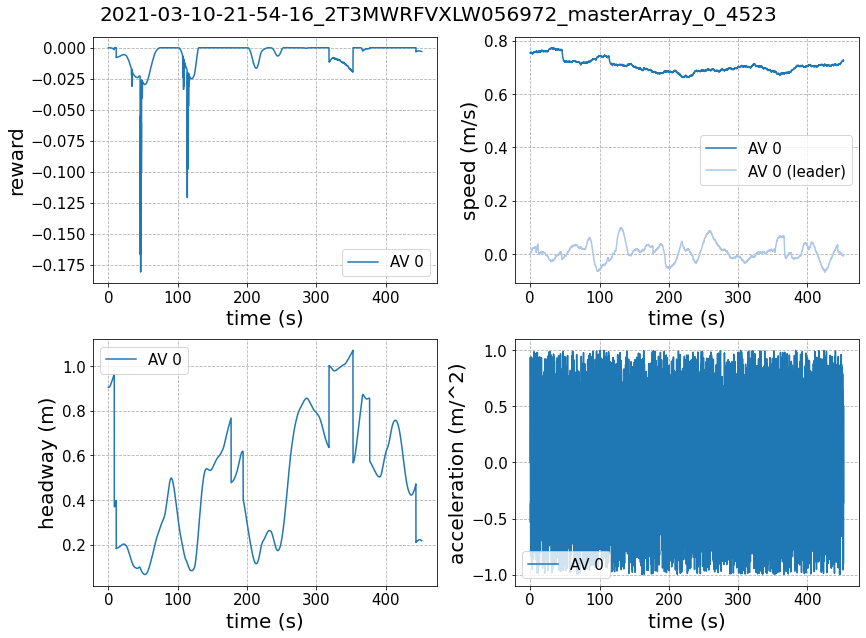

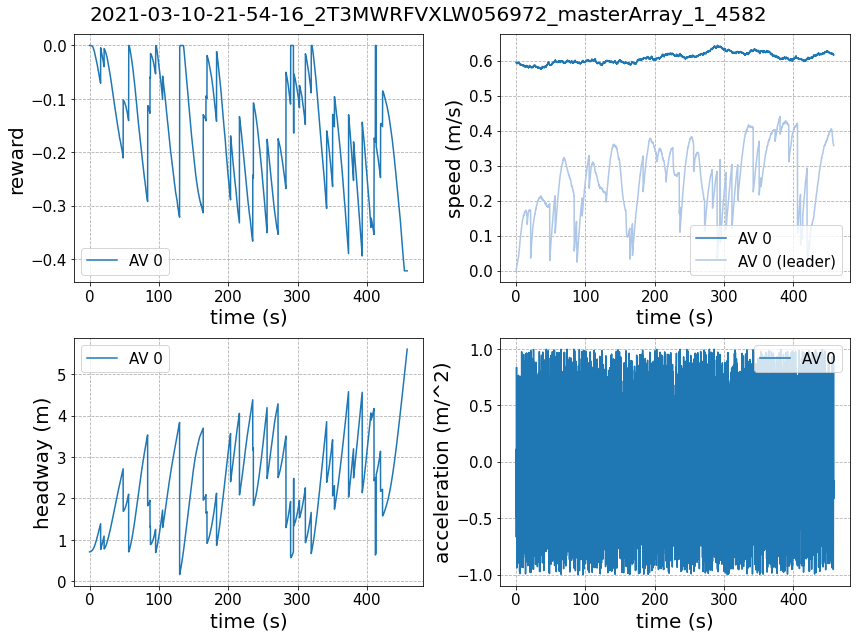

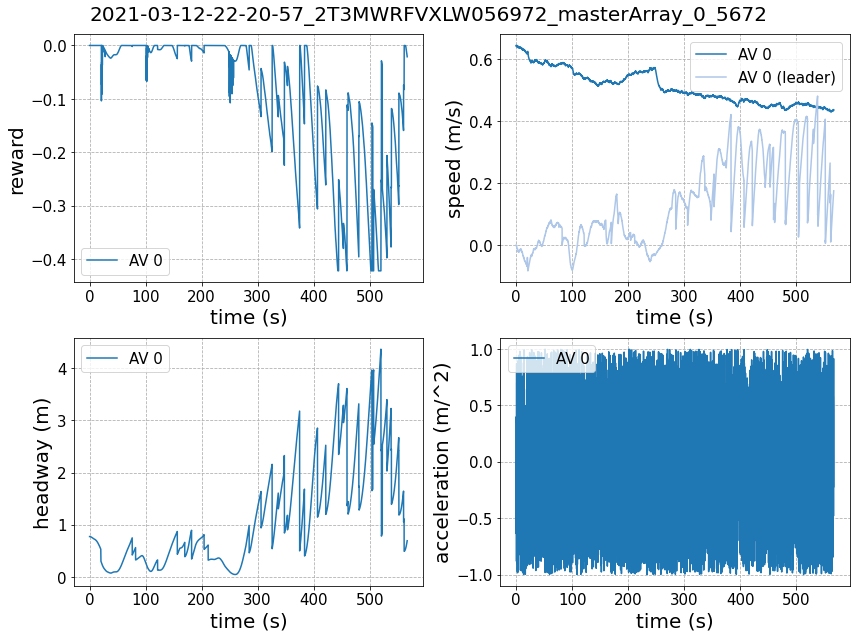

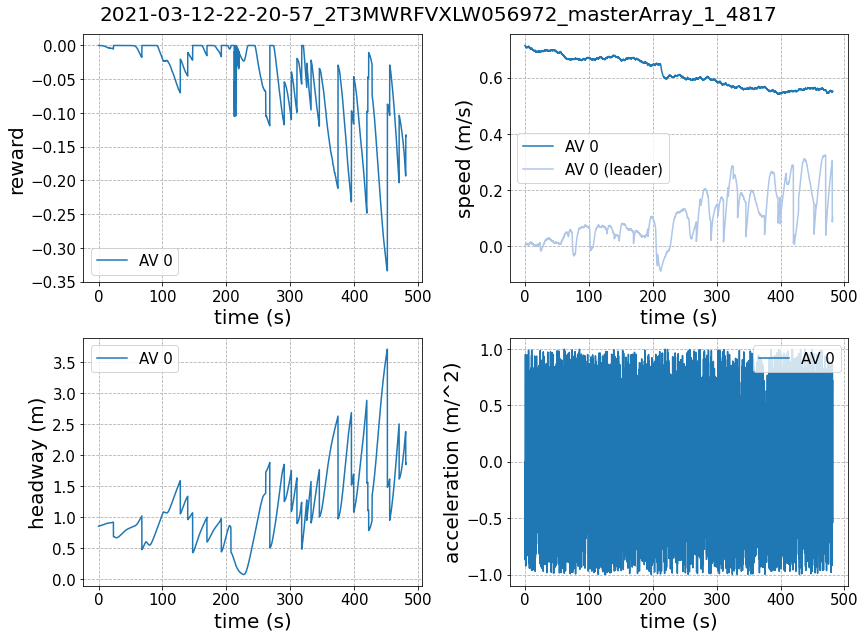

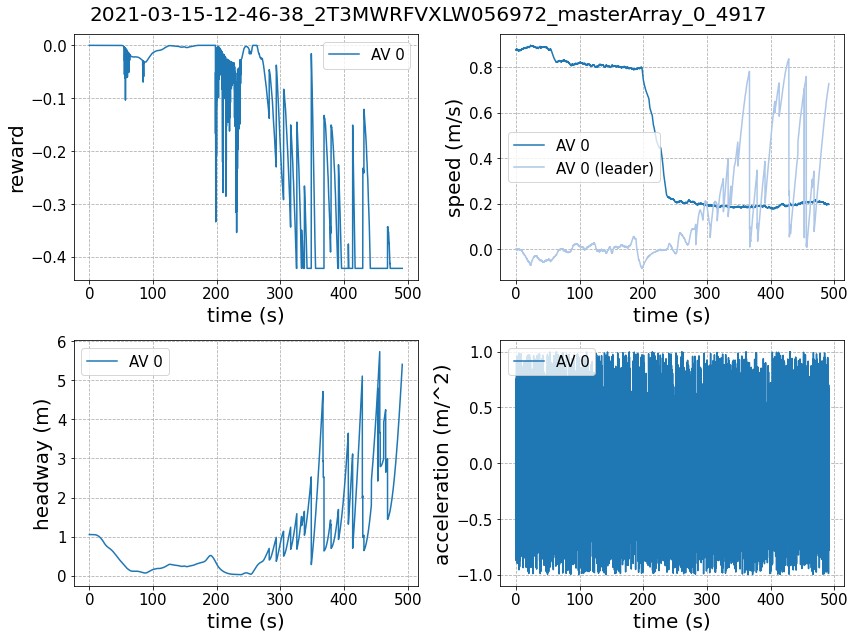

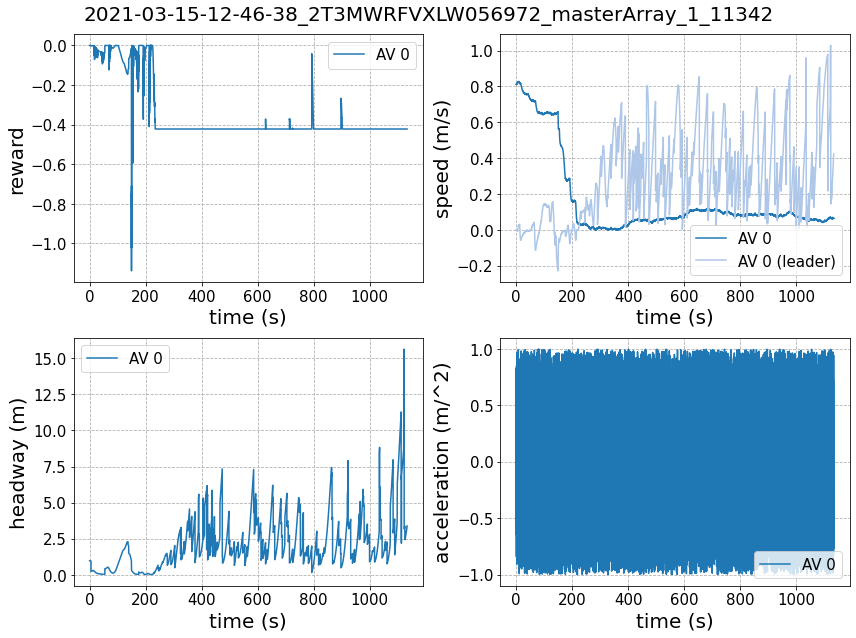

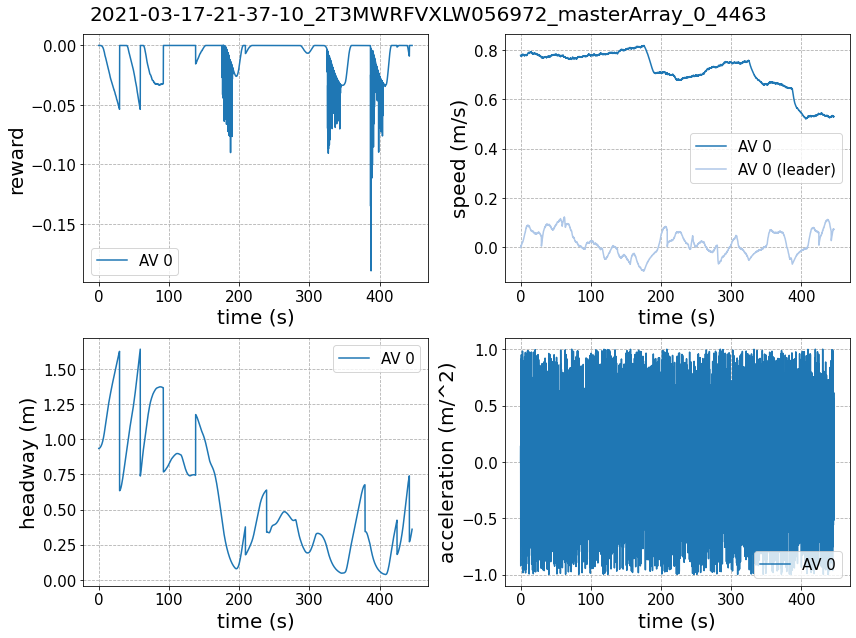

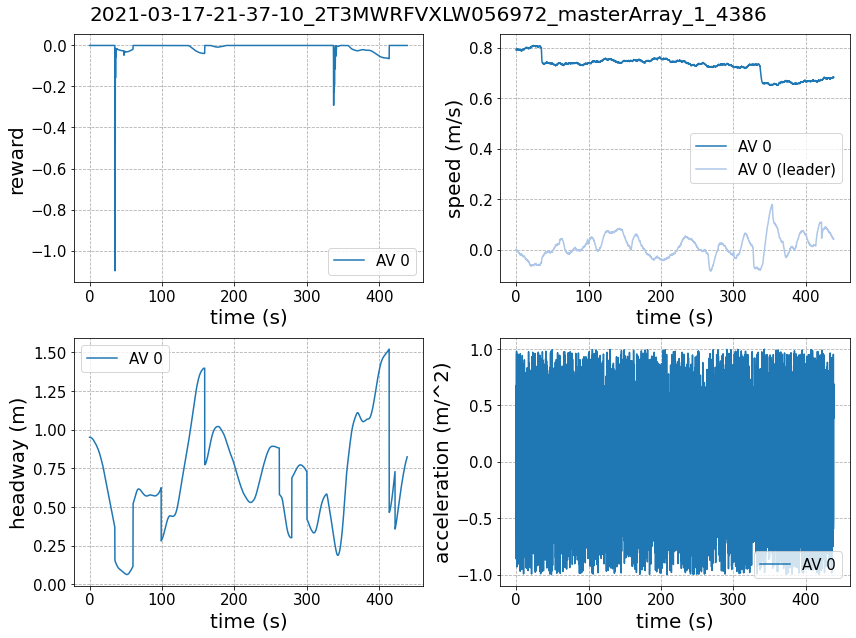

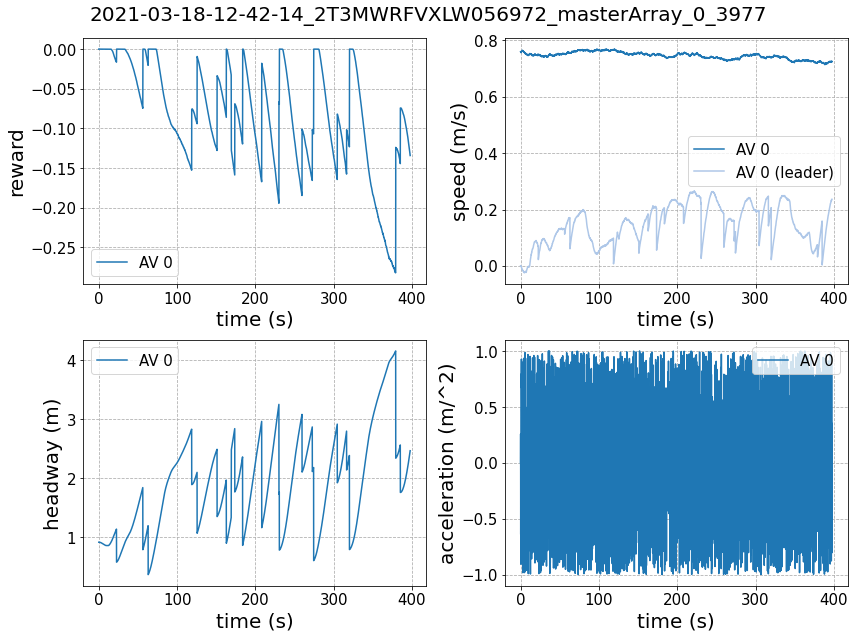

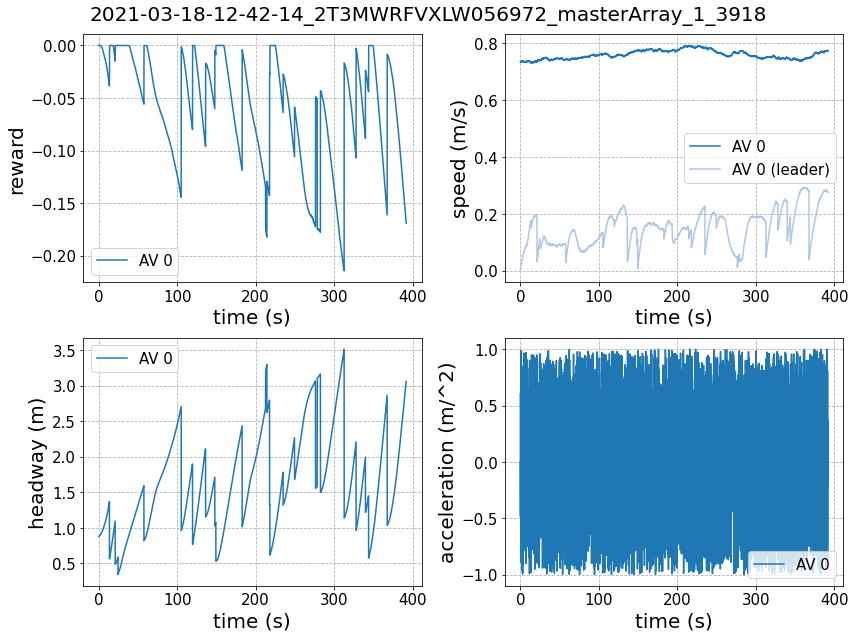

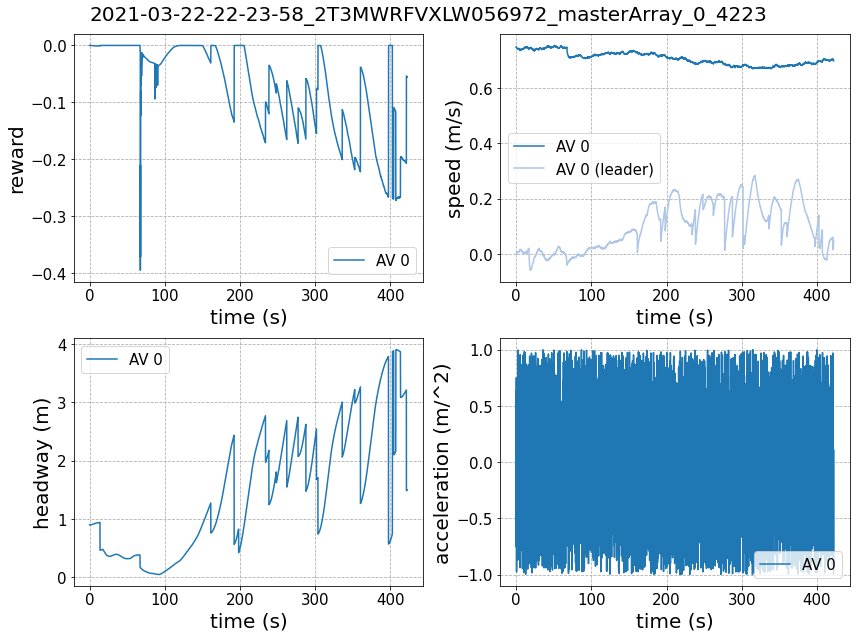

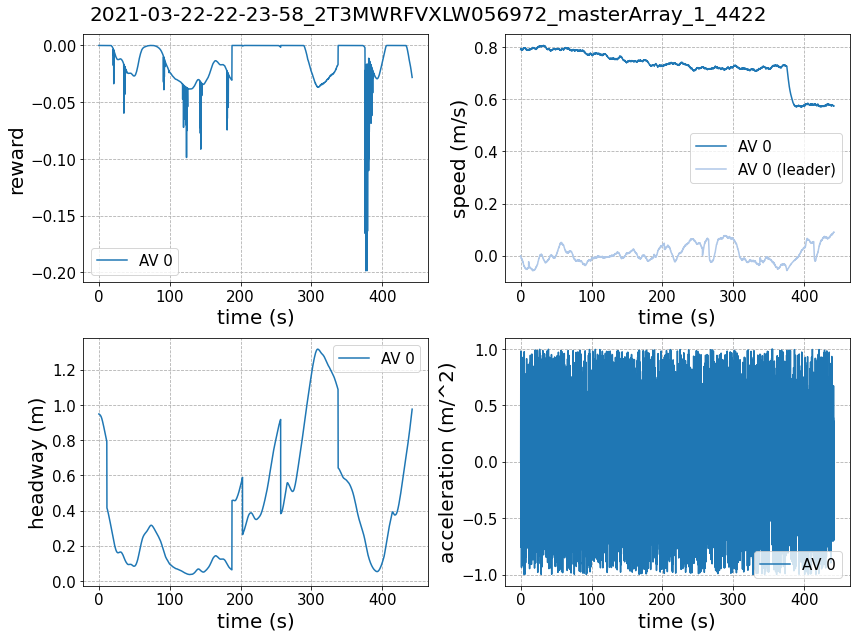

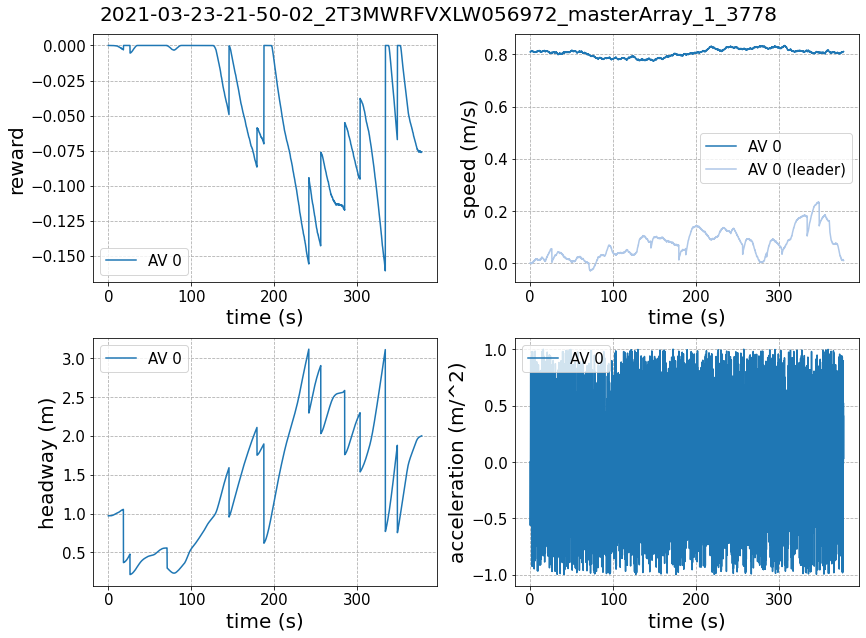

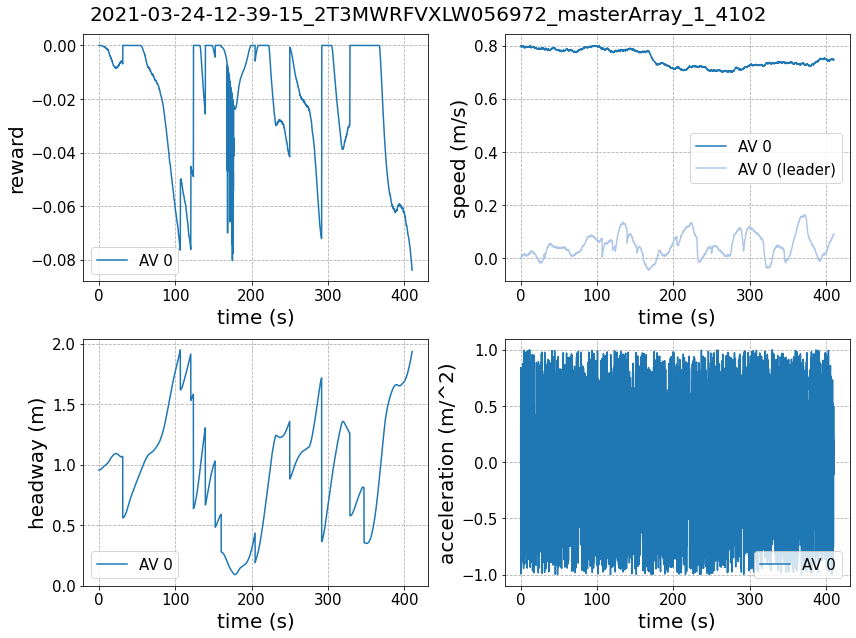

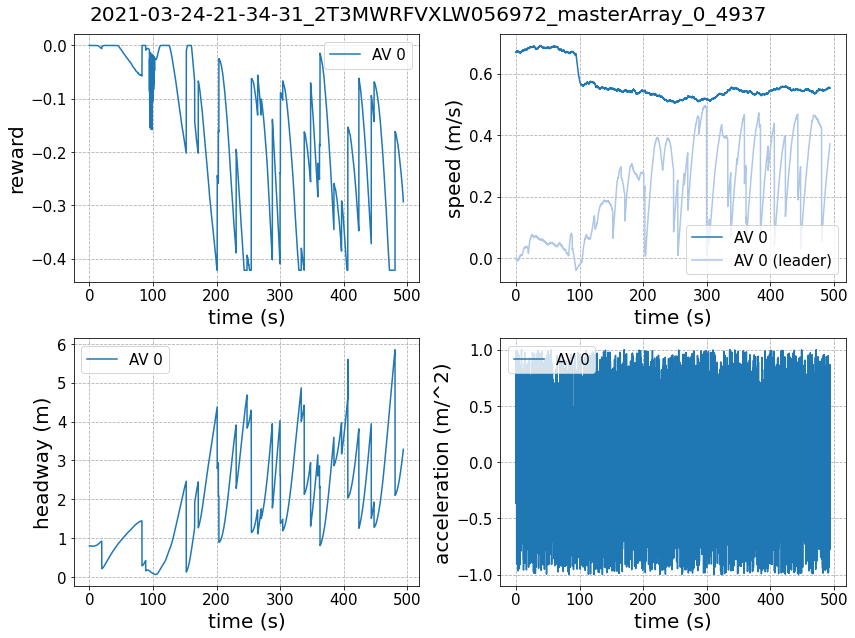

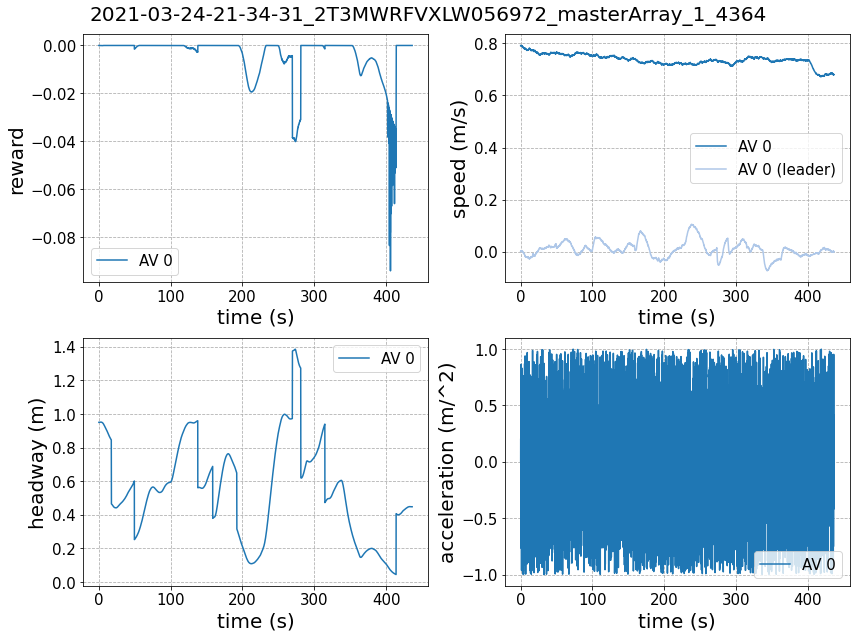

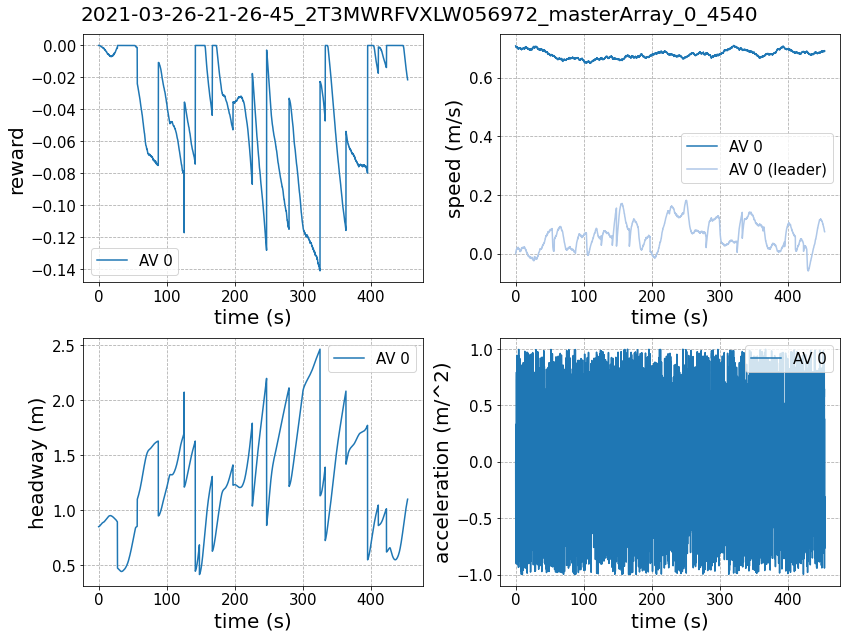

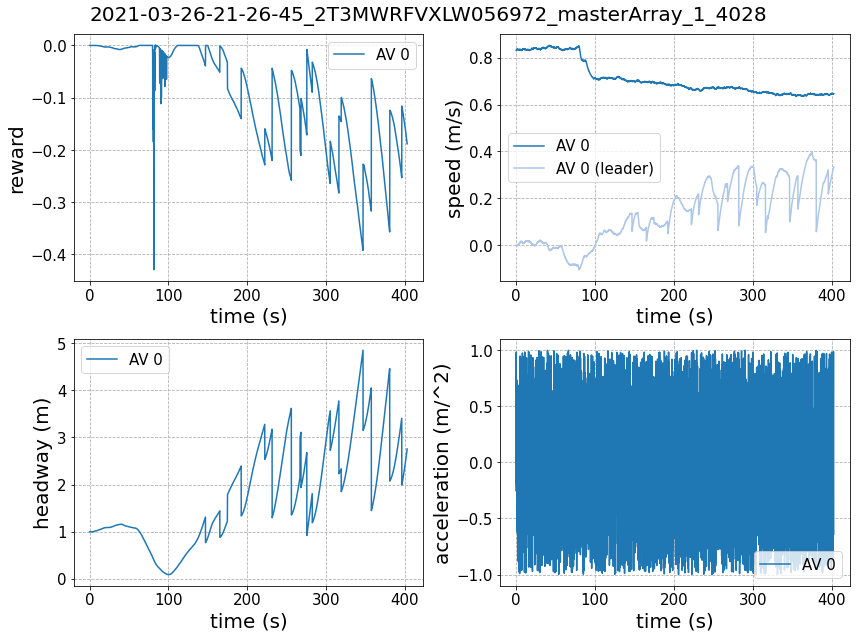

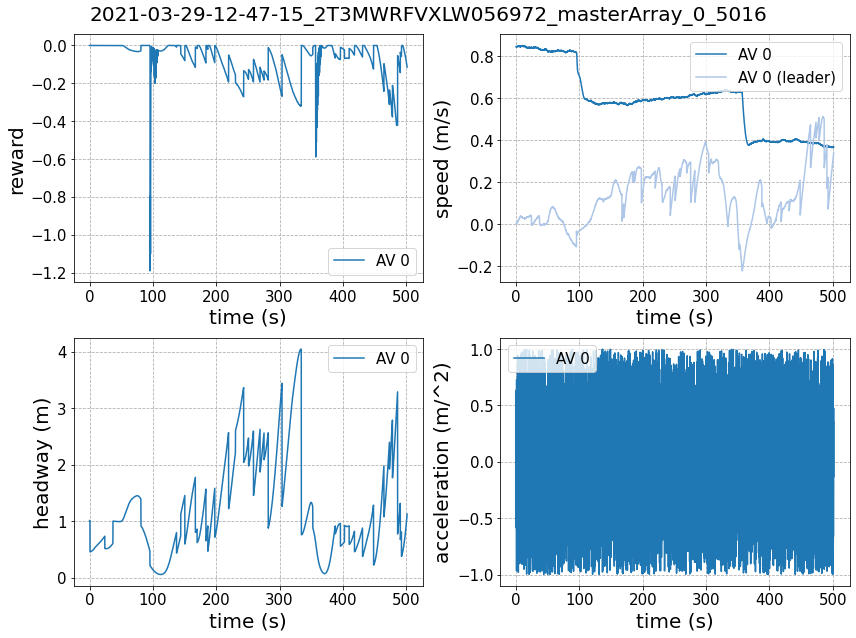

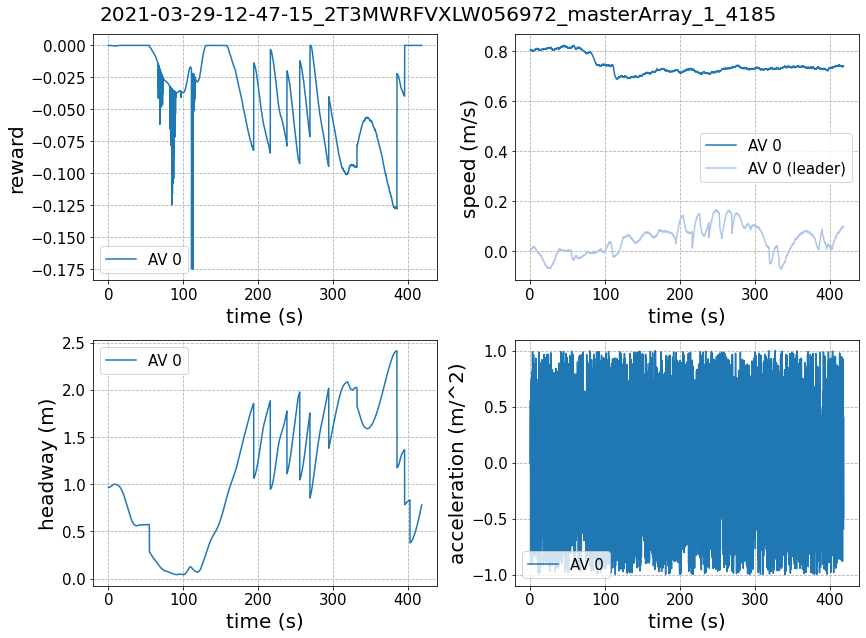

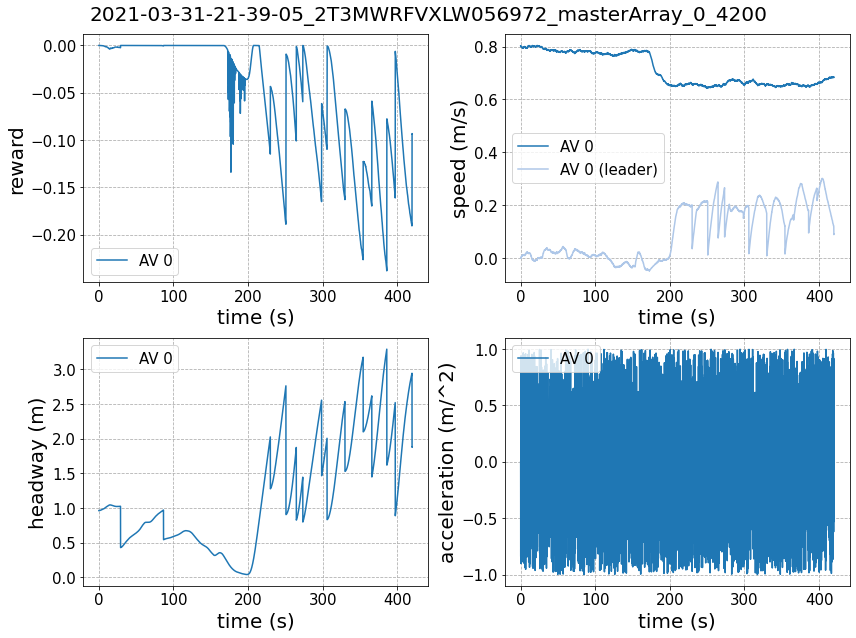

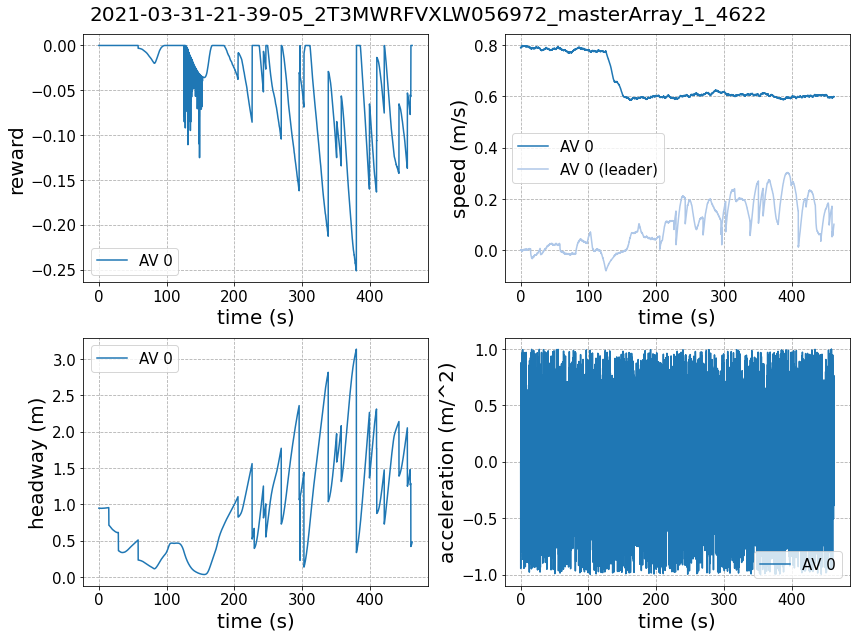

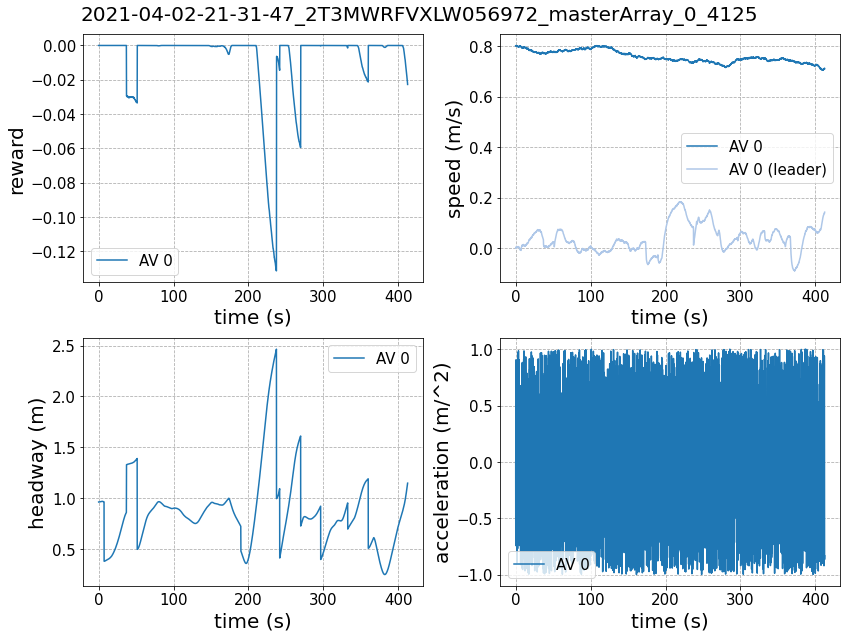

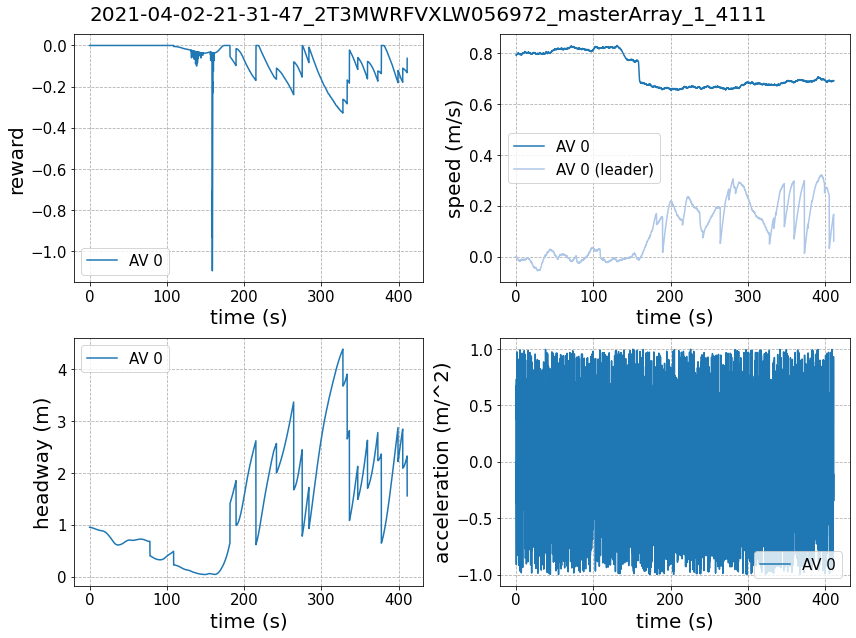

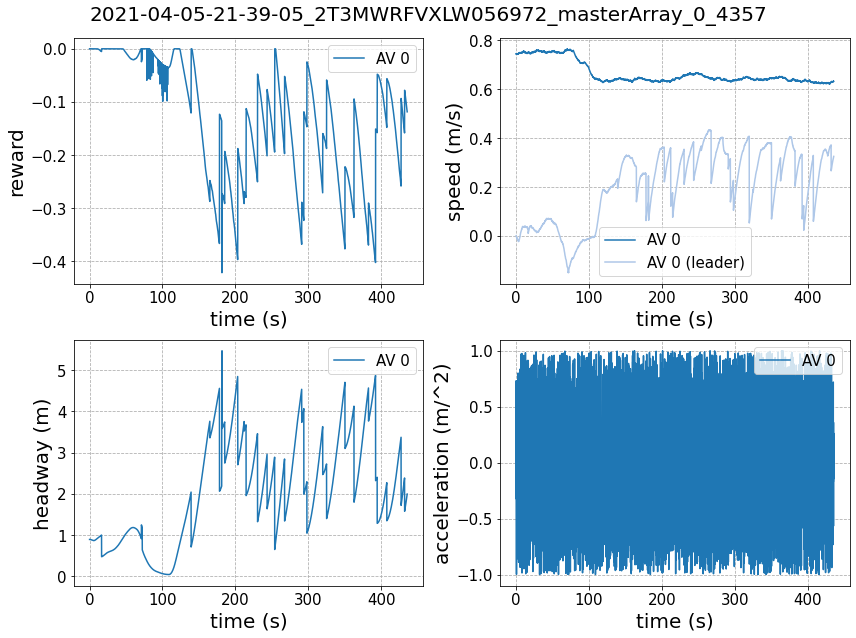

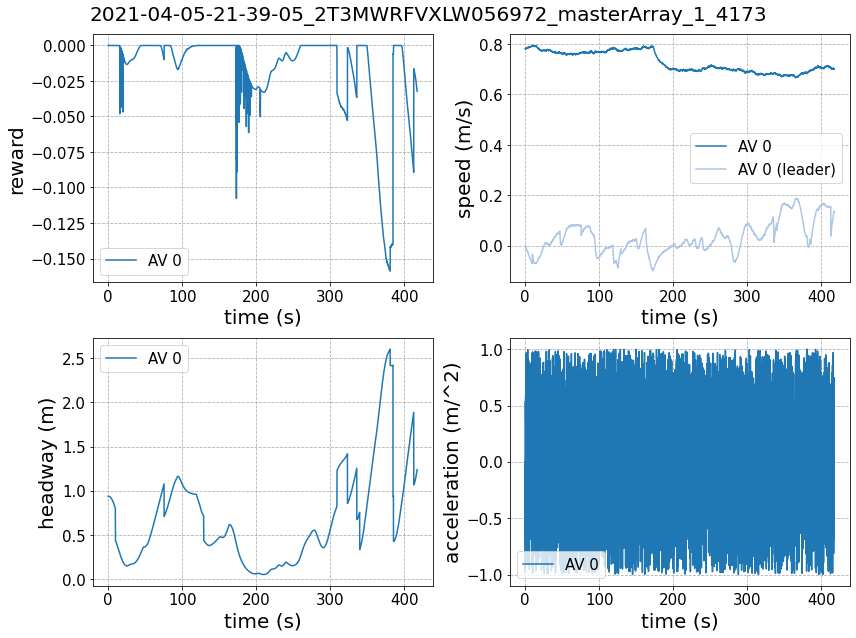

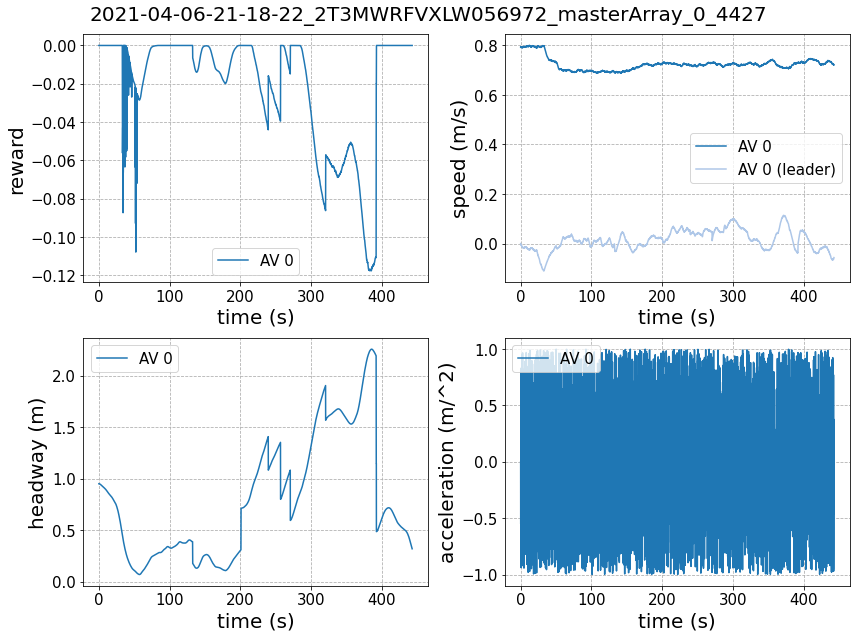

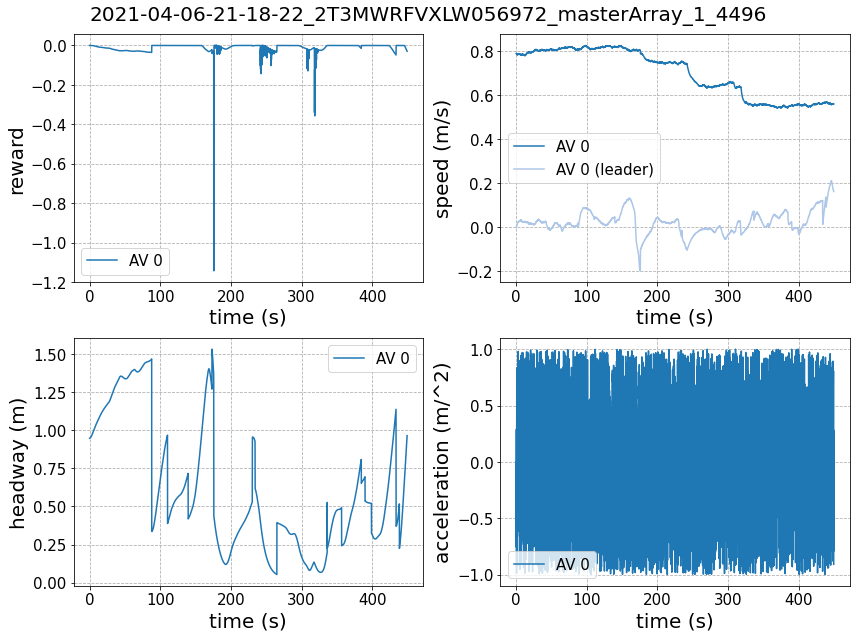

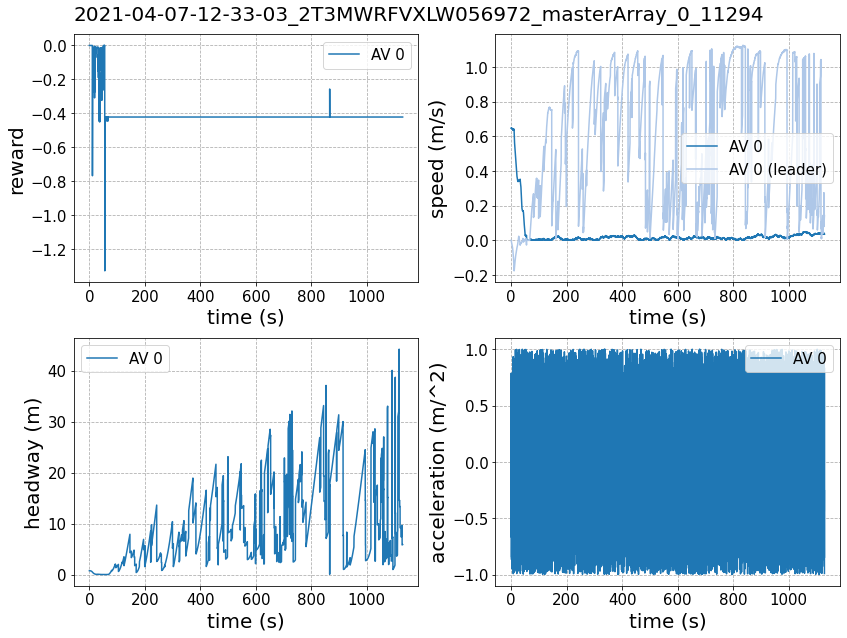

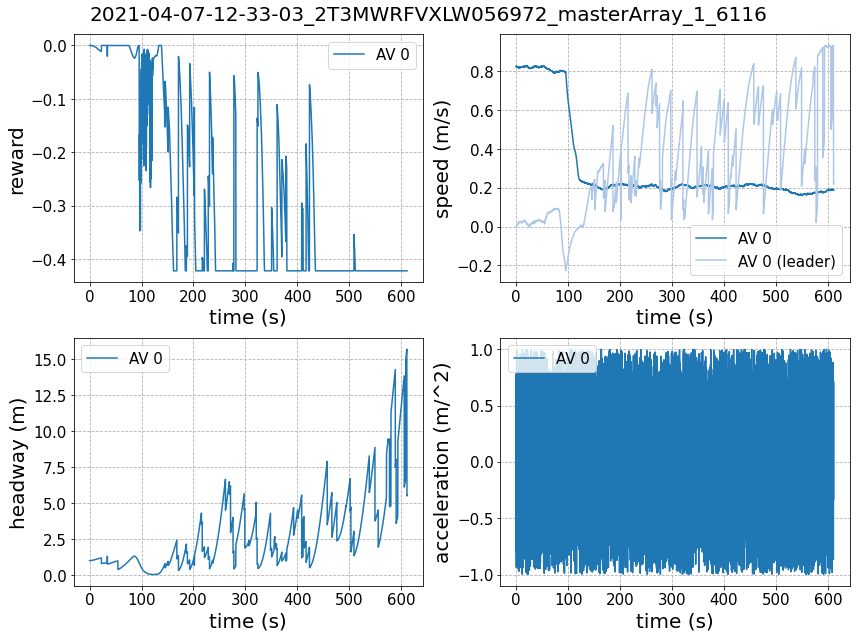

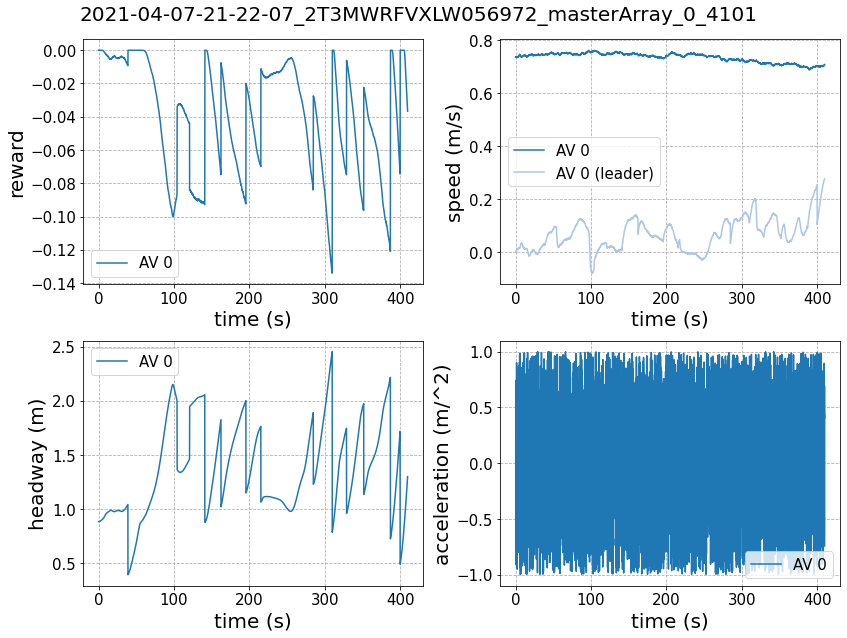

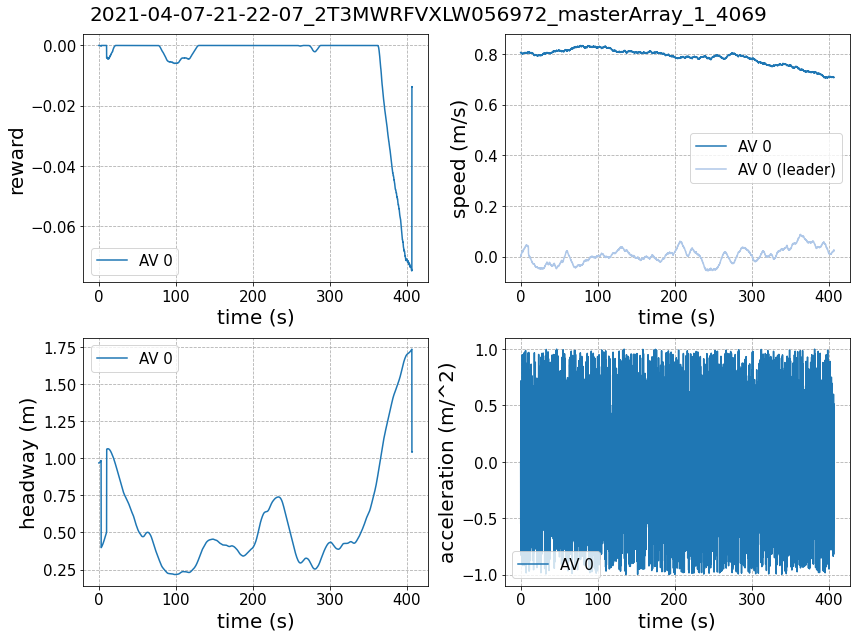

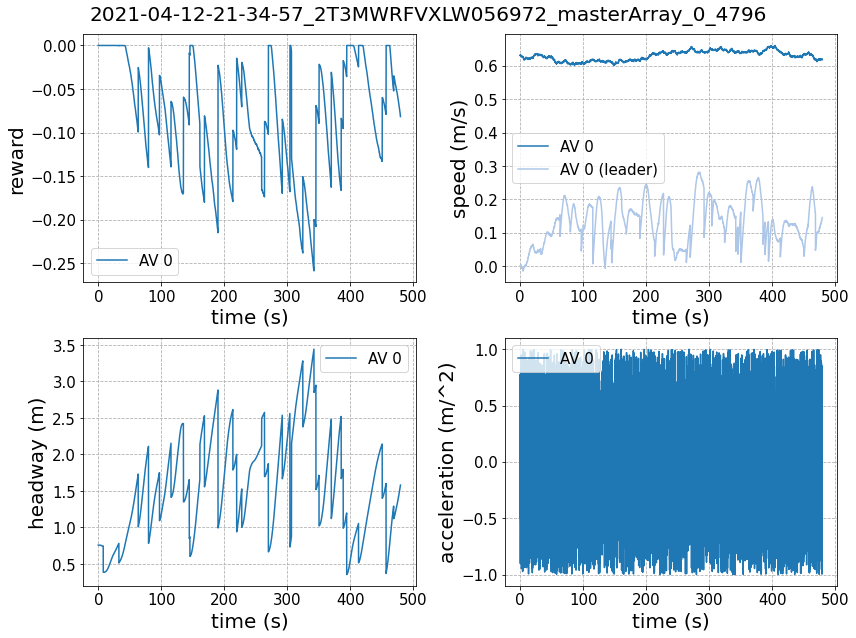

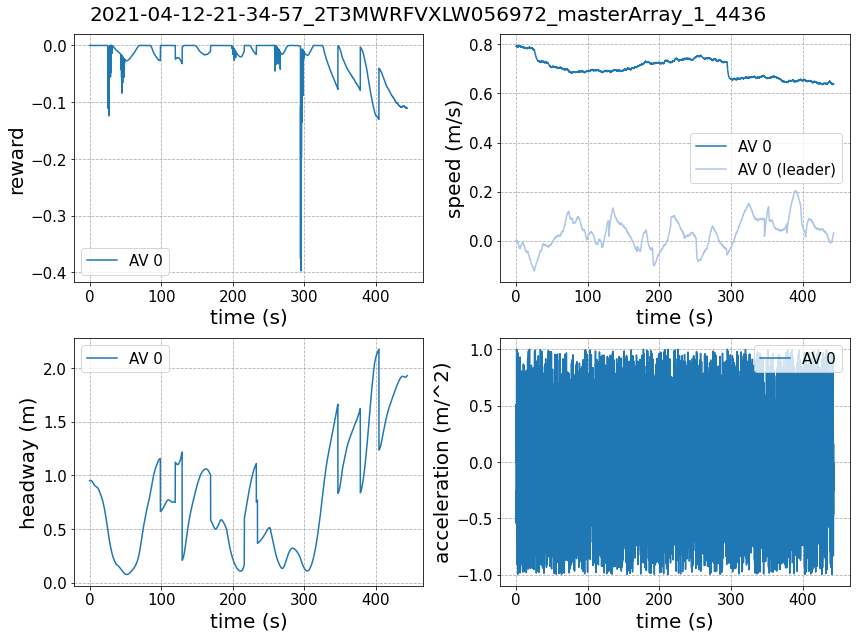

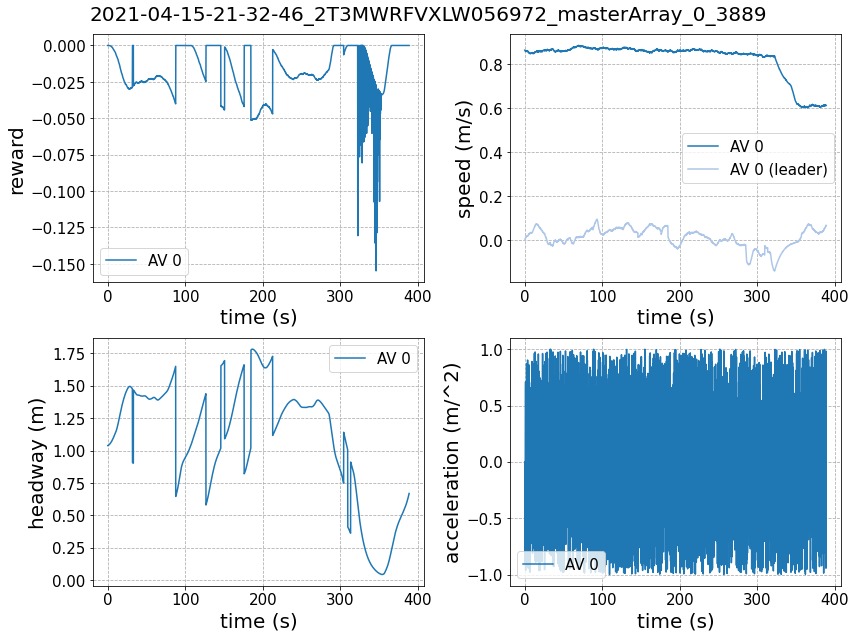

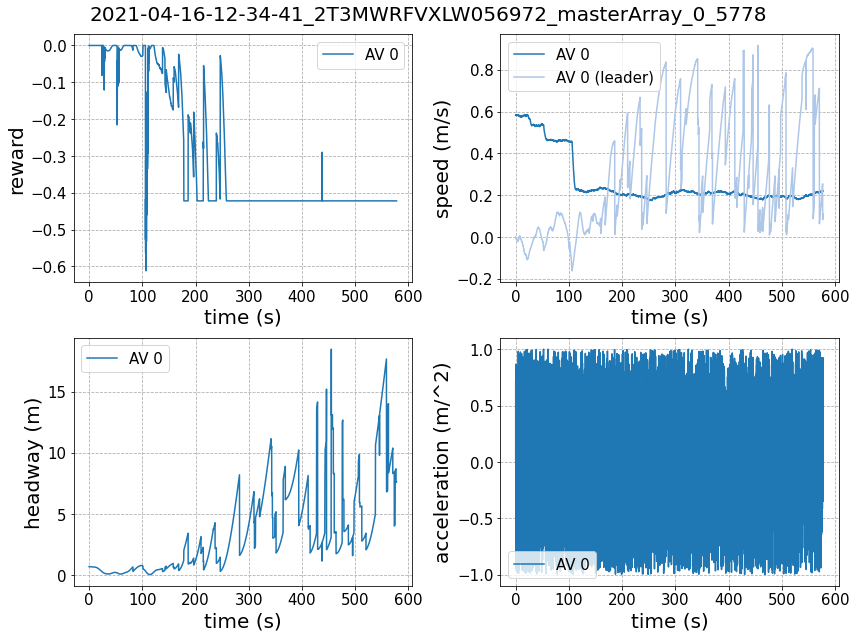

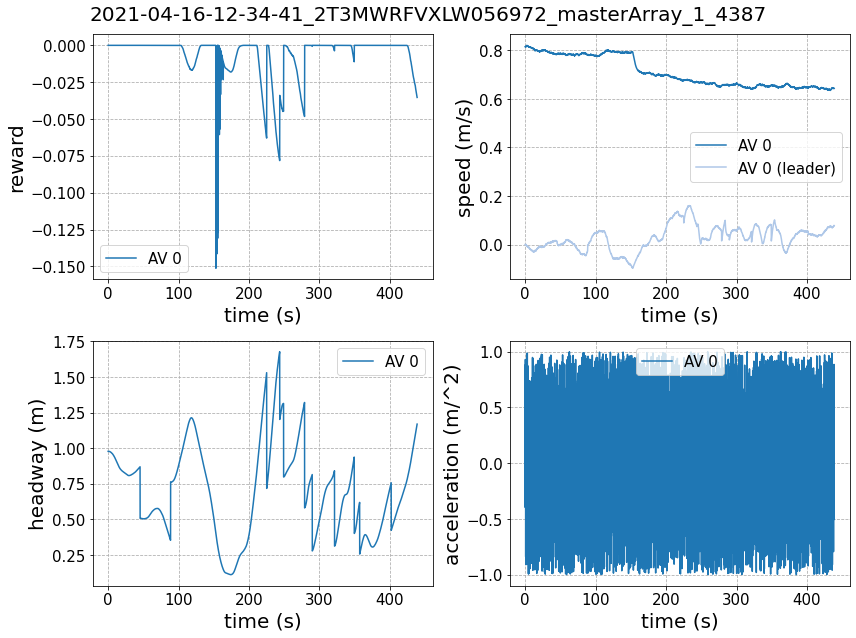

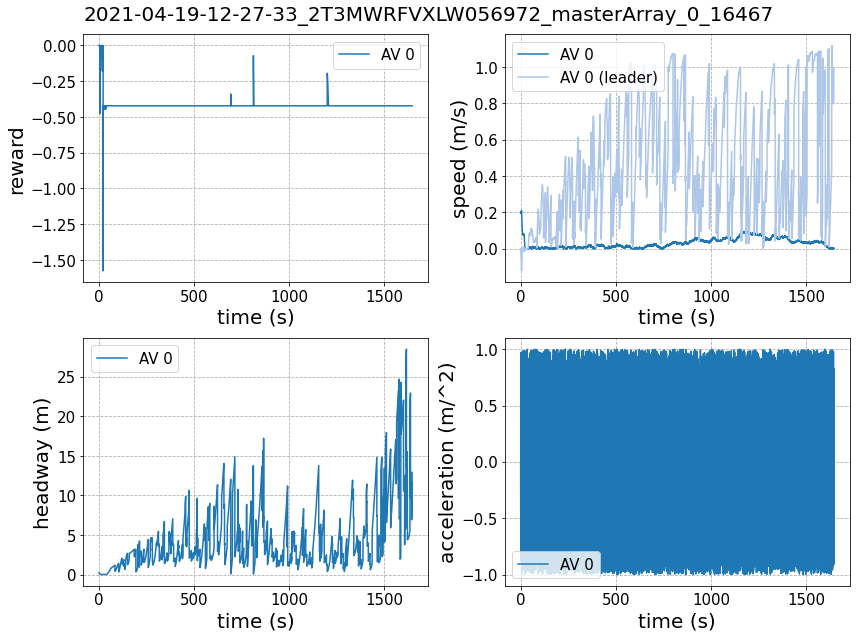

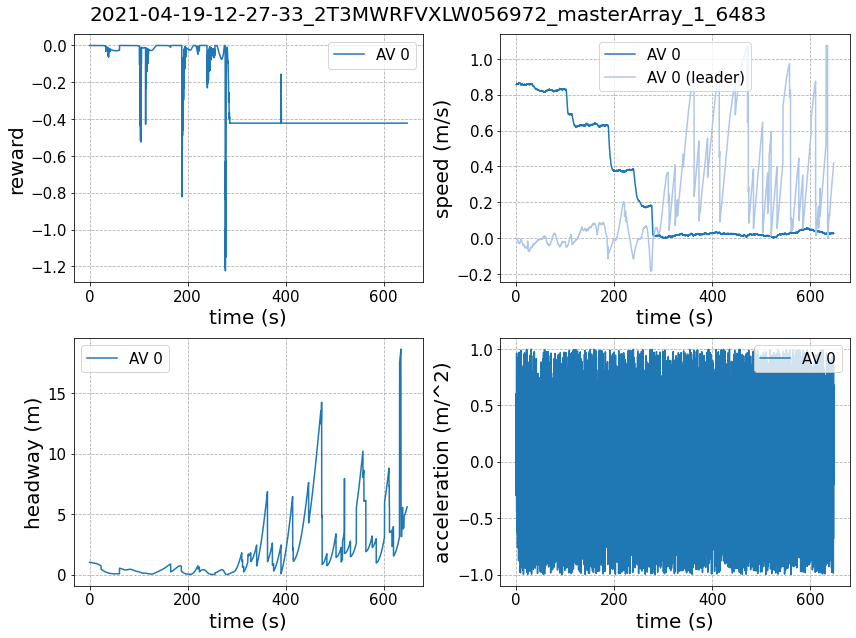

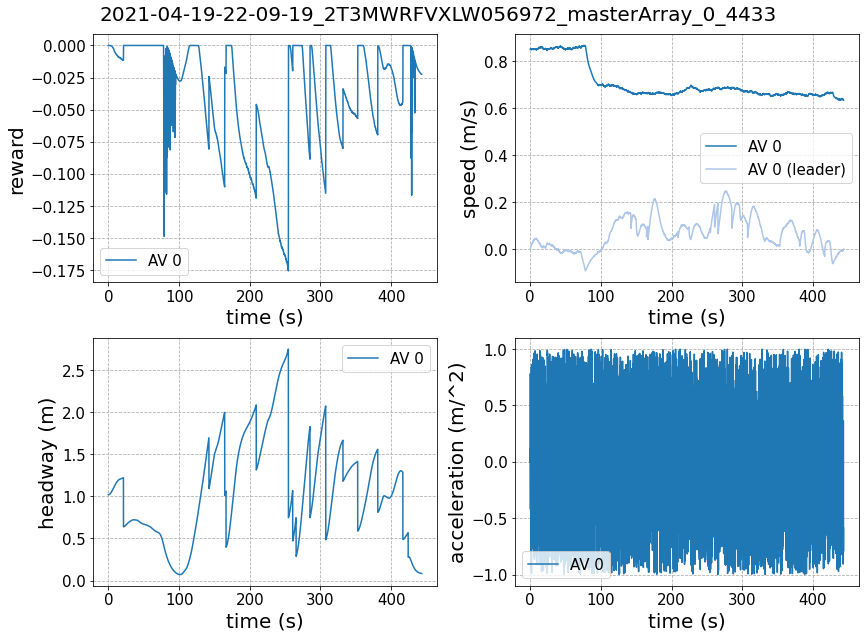

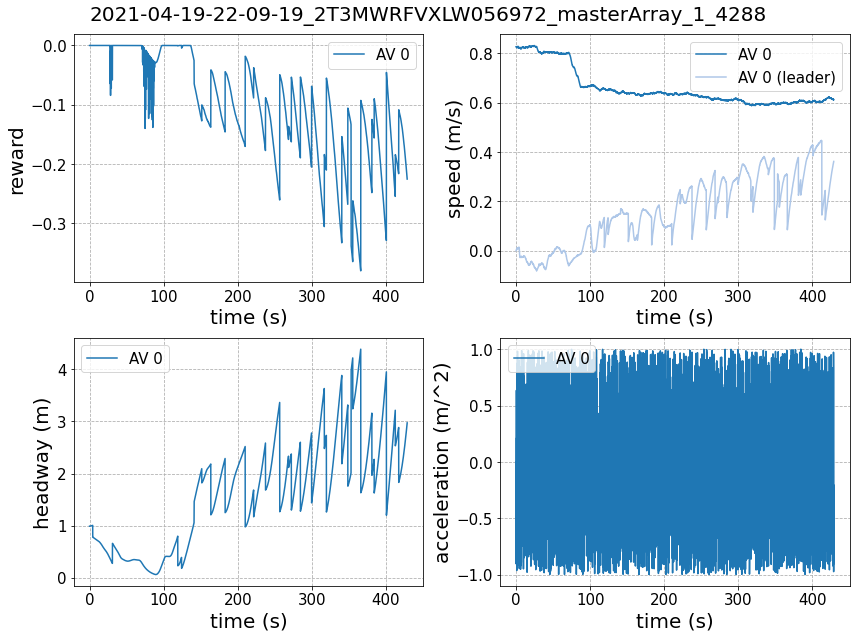

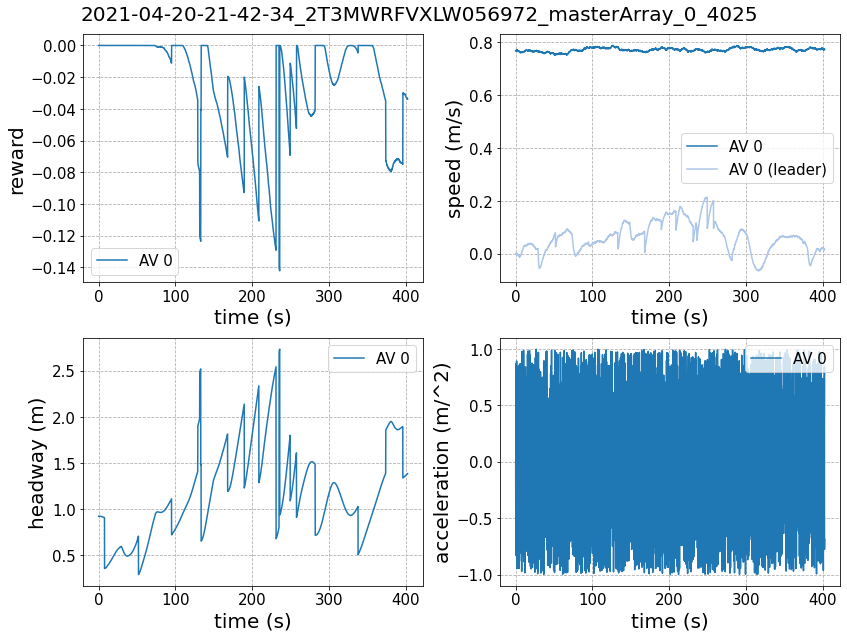

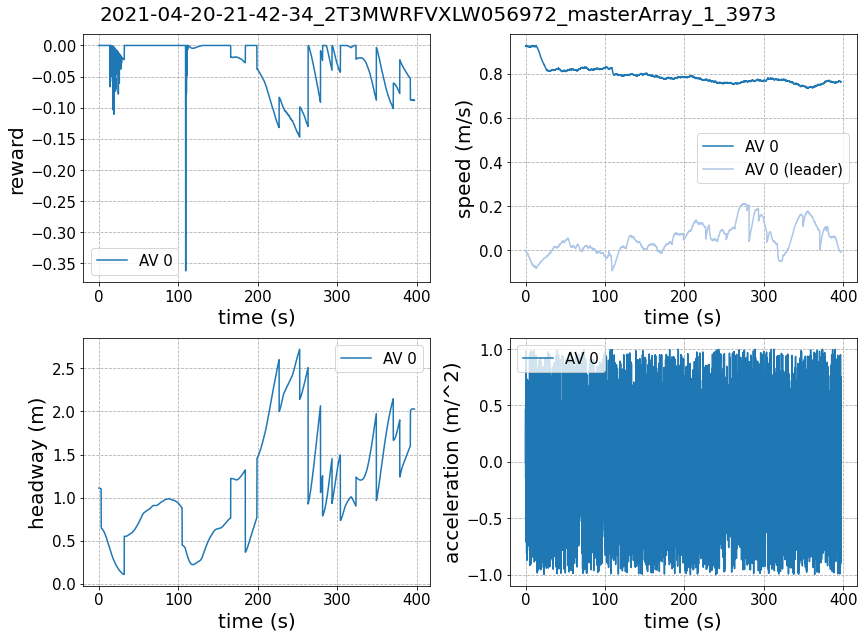

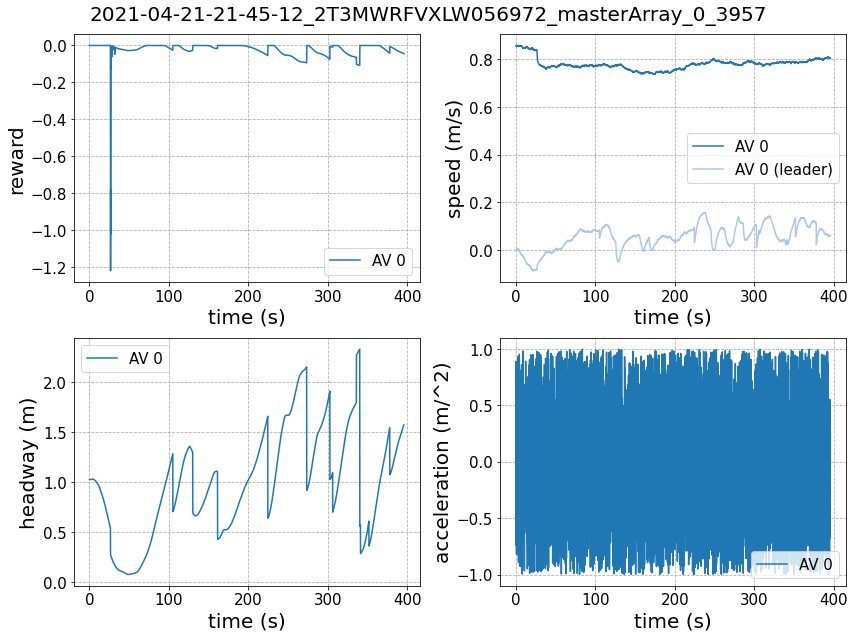

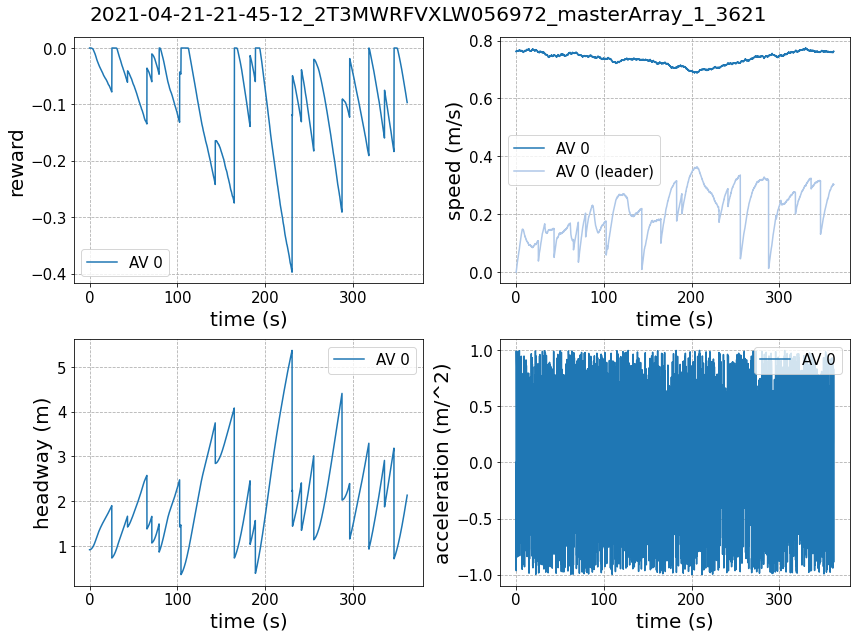

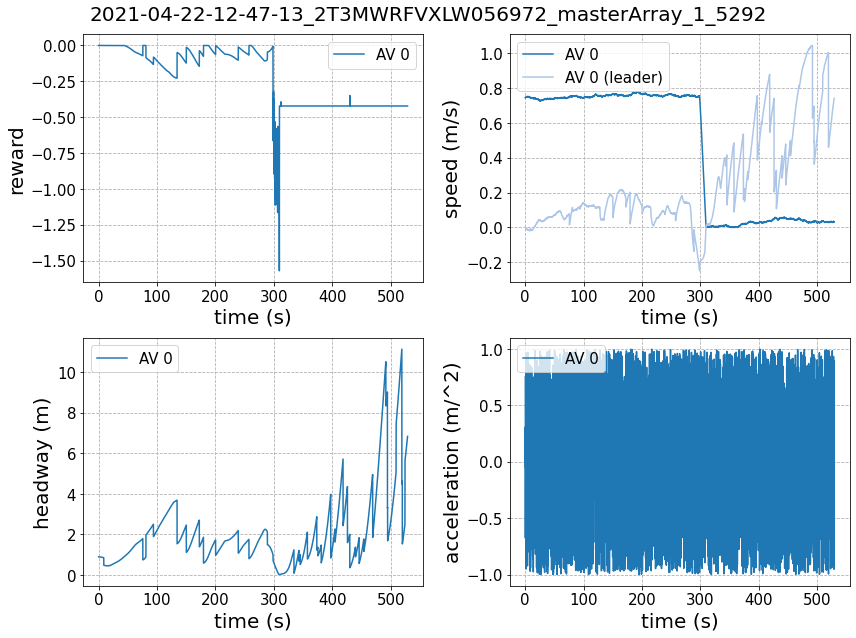

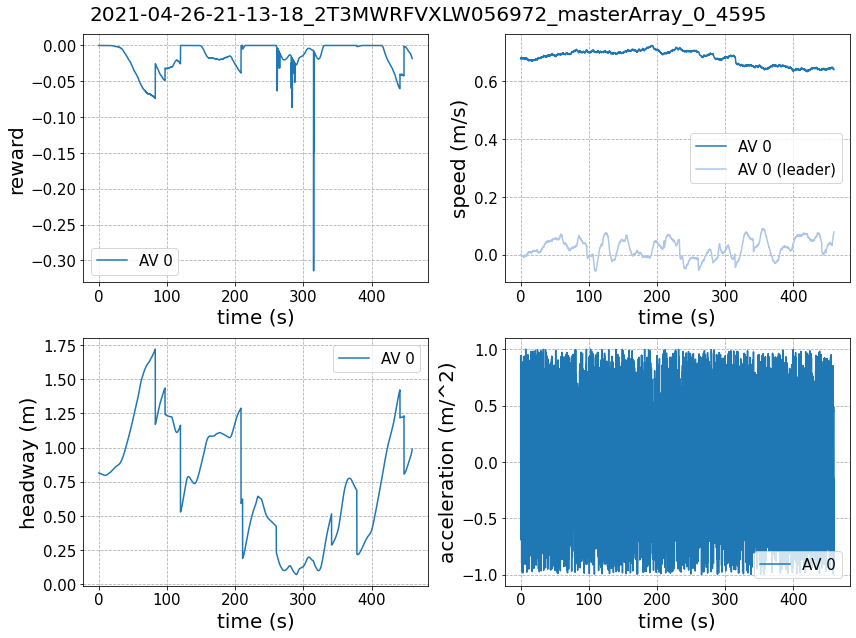

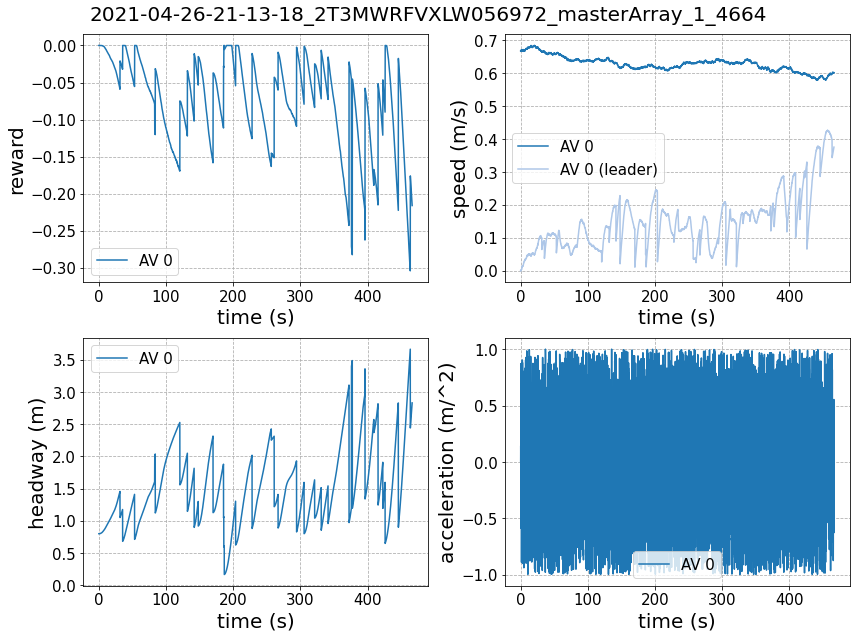

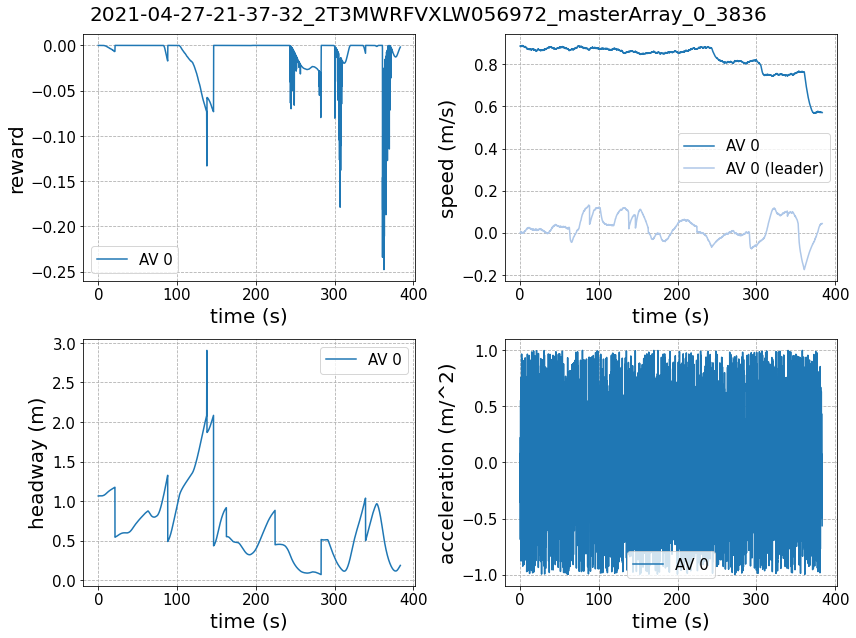

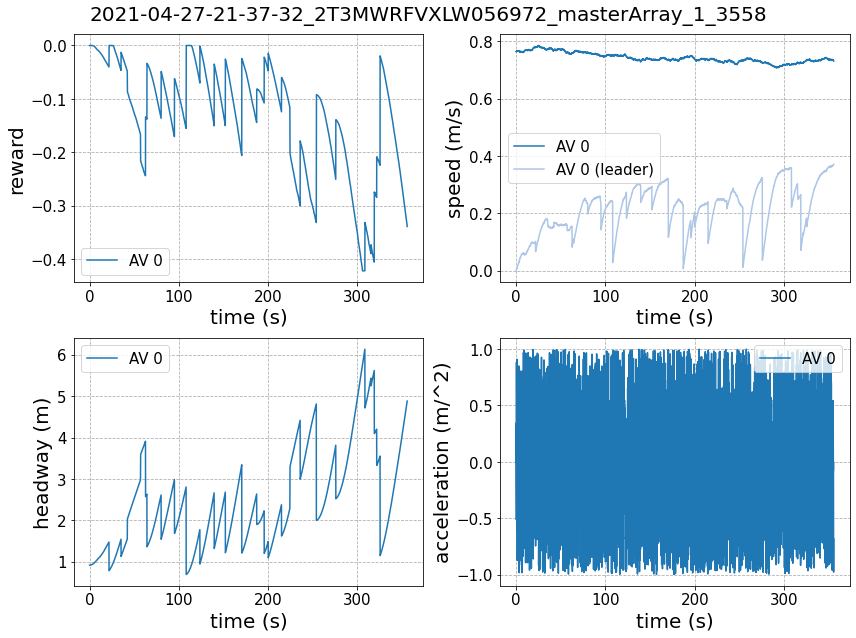

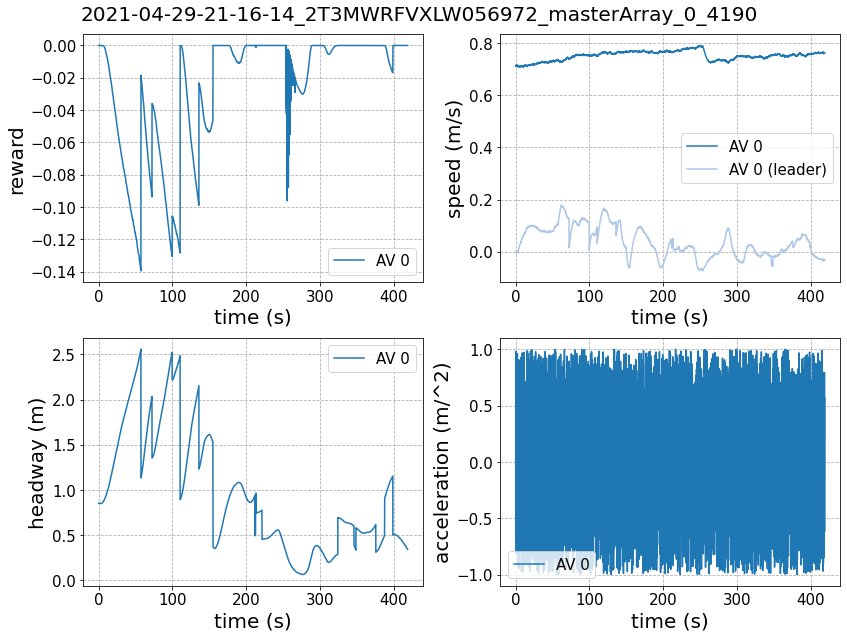

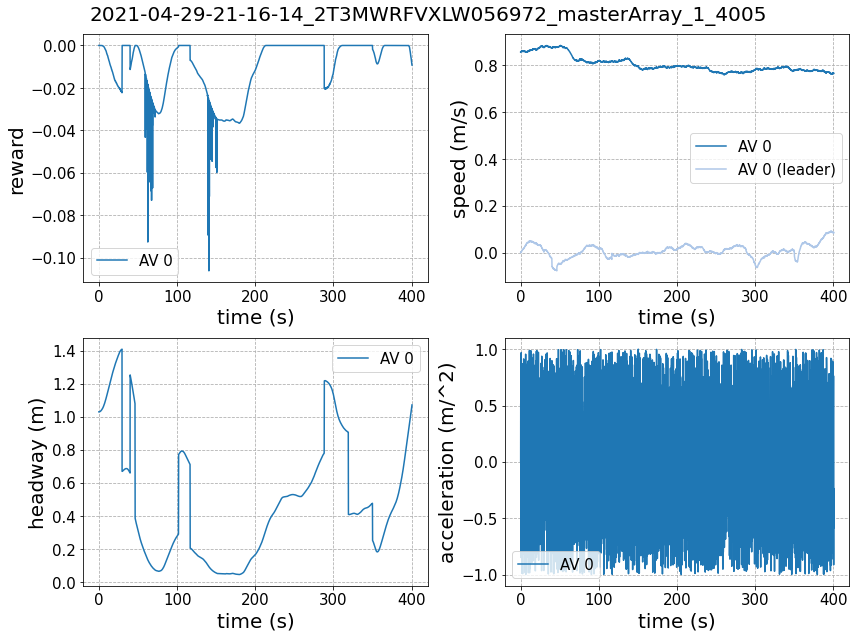

In [18]:
import pickle
import os
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import numpy as np
import pandas as pd

num_agents = 1
cmap = cm.get_cmap('tab20')

filenames = ["2021-03-08-22-35-14_2T3MWRFVXLW056972_masterArray_0_4597",
             "2021-03-08-22-35-14_2T3MWRFVXLW056972_masterArray_1_4927",
             "2021-03-09-13-35-04_2T3MWRFVXLW056972_masterArray_0_6825",
             "2021-03-09-13-35-04_2T3MWRFVXLW056972_masterArray_1_4938",
             "2021-03-10-21-54-16_2T3MWRFVXLW056972_masterArray_0_4523",
             "2021-03-10-21-54-16_2T3MWRFVXLW056972_masterArray_1_4582",
             "2021-03-12-22-20-57_2T3MWRFVXLW056972_masterArray_0_5672",
             "2021-03-12-22-20-57_2T3MWRFVXLW056972_masterArray_1_4817",
             "2021-03-15-12-46-38_2T3MWRFVXLW056972_masterArray_0_4917",  # comment for optimal
             "2021-03-15-12-46-38_2T3MWRFVXLW056972_masterArray_1_11342",
             "2021-03-17-21-37-10_2T3MWRFVXLW056972_masterArray_0_4463",
             "2021-03-17-21-37-10_2T3MWRFVXLW056972_masterArray_1_4386",
             "2021-03-18-12-42-14_2T3MWRFVXLW056972_masterArray_0_3977",
             "2021-03-18-12-42-14_2T3MWRFVXLW056972_masterArray_1_3918",
             "2021-03-22-22-23-58_2T3MWRFVXLW056972_masterArray_0_4223",
             "2021-03-22-22-23-58_2T3MWRFVXLW056972_masterArray_1_4422",
             "2021-03-23-21-50-02_2T3MWRFVXLW056972_masterArray_1_3778",
             "2021-03-24-12-39-15_2T3MWRFVXLW056972_masterArray_1_4102",
             "2021-03-24-21-34-31_2T3MWRFVXLW056972_masterArray_0_4937",
             "2021-03-24-21-34-31_2T3MWRFVXLW056972_masterArray_1_4364",
             "2021-03-26-21-26-45_2T3MWRFVXLW056972_masterArray_0_4540",
             "2021-03-26-21-26-45_2T3MWRFVXLW056972_masterArray_1_4028",
             "2021-03-29-12-47-15_2T3MWRFVXLW056972_masterArray_0_5016",
             "2021-03-29-12-47-15_2T3MWRFVXLW056972_masterArray_1_4185",
             "2021-03-31-21-39-05_2T3MWRFVXLW056972_masterArray_0_4200",
             "2021-03-31-21-39-05_2T3MWRFVXLW056972_masterArray_1_4622",
             "2021-04-02-21-31-47_2T3MWRFVXLW056972_masterArray_0_4125",
             "2021-04-02-21-31-47_2T3MWRFVXLW056972_masterArray_1_4111",
             "2021-04-05-21-39-05_2T3MWRFVXLW056972_masterArray_0_4357",
             "2021-04-05-21-39-05_2T3MWRFVXLW056972_masterArray_1_4173",
             "2021-04-06-21-18-22_2T3MWRFVXLW056972_masterArray_0_4427",
             "2021-04-06-21-18-22_2T3MWRFVXLW056972_masterArray_1_4496",
             "2021-04-07-12-33-03_2T3MWRFVXLW056972_masterArray_0_11294",
             "2021-04-07-12-33-03_2T3MWRFVXLW056972_masterArray_1_6116",
             "2021-04-07-21-22-07_2T3MWRFVXLW056972_masterArray_0_4101",
             "2021-04-07-21-22-07_2T3MWRFVXLW056972_masterArray_1_4069",
             "2021-04-12-21-34-57_2T3MWRFVXLW056972_masterArray_0_4796",
             "2021-04-12-21-34-57_2T3MWRFVXLW056972_masterArray_1_4436",
             "2021-04-15-21-32-46_2T3MWRFVXLW056972_masterArray_0_3889",
             "2021-04-16-12-34-41_2T3MWRFVXLW056972_masterArray_0_5778",
             "2021-04-16-12-34-41_2T3MWRFVXLW056972_masterArray_1_4387",
             "2021-04-19-12-27-33_2T3MWRFVXLW056972_masterArray_0_16467",
             "2021-04-19-12-27-33_2T3MWRFVXLW056972_masterArray_1_6483",
             "2021-04-19-22-09-19_2T3MWRFVXLW056972_masterArray_0_4433",
             "2021-04-19-22-09-19_2T3MWRFVXLW056972_masterArray_1_4288",
             "2021-04-20-21-42-34_2T3MWRFVXLW056972_masterArray_0_4025",
             "2021-04-20-21-42-34_2T3MWRFVXLW056972_masterArray_1_3973",
             "2021-04-21-21-45-12_2T3MWRFVXLW056972_masterArray_0_3957",
             "2021-04-21-21-45-12_2T3MWRFVXLW056972_masterArray_1_3621",
             "2021-04-22-12-47-13_2T3MWRFVXLW056972_masterArray_1_5292",
             "2021-04-26-21-13-18_2T3MWRFVXLW056972_masterArray_0_4595",
             "2021-04-26-21-13-18_2T3MWRFVXLW056972_masterArray_1_4664",
             "2021-04-27-21-37-32_2T3MWRFVXLW056972_masterArray_0_3836",
             "2021-04-27-21-37-32_2T3MWRFVXLW056972_masterArray_1_3558",
             "2021-04-29-21-16-14_2T3MWRFVXLW056972_masterArray_0_4190",
             "2021-04-29-21-16-14_2T3MWRFVXLW056972_masterArray_1_4005"]

for i in range(len(filenames)):
    directory = "random"
    fp = os.path.join(directory, "{}.pkl".format(filenames[i]))

    with open(fp, "rb") as f:
        data = pickle.load(f)

    actions = [x[1] for x in data]    
    rewards = [x[2] for x in data]
    states = [x[0] for x in data]    
    next_states = [x[3] for x in data]
    
    #print(np.array(actions), np.array(rewards), np.array(states), np.array(next_states))

    rewards = [x[2] for x in data]
    speed = [x[0][4] for x in data]
    lead_speed = [x[0][9] for x in data]
    headway = [x[0][14] for x in data]
    accel = [x[1][0] for x in data]
    num_steps = len(rewards) // num_agents

    timesteps = np.arange(num_steps) * 0.1

    fig, ax = plt.subplots(2, 2, figsize=(12, 9))

    # ax[0, 0].set_title("Reward", fontsize=20)
    ax[0, 0].set_xlabel("time (s)", fontsize=20)
    ax[0, 0].set_ylabel("reward", fontsize=20)
    ax[0, 0].plot(timesteps, rewards[:num_steps], label="AV 0", c=cmap(0))
    if num_agents == 2:
        ax[0, 0].plot(timesteps, rewards[num_steps:], label="AV 1", c=cmap(6))
    ax[0, 0].grid(linestyle="--")
    ax[0, 0].tick_params(axis='x', labelsize=15)
    ax[0, 0].tick_params(axis='y', labelsize=15)
    ax[0, 0].legend(fontsize=15)

    # ax[0, 1].set_title("Speed", fontsize=20)
    ax[0, 1].set_xlabel("time (s)", fontsize=20)
    ax[0, 1].set_ylabel("speed (m/s)", fontsize=20)
    ax[0, 1].plot(timesteps, speed[:num_steps], label="AV 0", c=cmap(0))
    ax[0, 1].plot(timesteps, lead_speed[:num_steps], label="AV 0 (leader)", c=cmap(1))
    if num_agents == 2:
        ax[0, 1].plot(timesteps, speed[num_steps:], label="AV 1", c=cmap(6))
        ax[0, 1].plot(timesteps, lead_speed[num_steps:], label="AV 1 (leader)", c=cmap(7))
    ax[0, 1].grid(linestyle="--")
    ax[0, 1].tick_params(axis='x', labelsize=15)
    ax[0, 1].tick_params(axis='y', labelsize=15)
    ax[0, 1].legend(fontsize=15)

    # ax[1, 0].set_title("Headway", fontsize=20)
    ax[1, 0].set_xlabel("time (s)", fontsize=20)
    ax[1, 0].set_ylabel("headway (m)", fontsize=20)
    ax[1, 0].plot(timesteps, headway[:num_steps], label="AV 0", c=cmap(0))
    if num_agents == 2:
        ax[1, 0].plot(timesteps, headway[num_steps:], label="AV 1", c=cmap(6))
    ax[1, 0].grid(linestyle="--")
    ax[1, 0].tick_params(axis='x', labelsize=15)
    ax[1, 0].tick_params(axis='y', labelsize=15)
    ax[1, 0].legend(fontsize=15)

    # ax[1, 1].set_title("Acceleration", fontsize=20)
    ax[1, 1].set_xlabel("time (s)", fontsize=20)
    ax[1, 1].set_ylabel("acceleration (m/^2)", fontsize=20)
    ax[1, 1].plot(timesteps, accel[:num_steps], label="AV 0", c=cmap(0))
    if num_agents == 2:
        ax[1, 1].plot(timesteps, accel[num_steps:], label="AV 1", c=cmap(6))
    ax[1, 1].grid(linestyle="--")
    ax[1, 1].tick_params(axis='x', labelsize=15)
    ax[1, 1].tick_params(axis='y', labelsize=15)
    ax[1, 1].legend(fontsize=15)

    plt.suptitle("{}".format(filenames[i]), fontsize=20)

    fig.tight_layout()
    
    plt.savefig(os.path.join(directory, "{}.png".format(filenames[i])), bbox_inches="tight")

    plt.show()